In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import unicode_literals

import deepchem as dc
from deepchem.molnet import load_delaney
from deepchem.models import GraphConvModel

import pandas as pd

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depreca

In [445]:
# np.random.seed(123)
# tf.random.set_seed(123)

#Setting up model

In [3]:

delaney_tasks = ['desired']
# delaney_tasks = ['clearance']
# delaney_tasks = ['perferredClearance']

featurizer = dc.feat.ConvMolFeaturizer()
# featurizer = dc.feat.RDKitDescriptors()

input_dataset = "../../../project1_data/previousDir/Series4_workingCopy.csv"
# input_dataset = "../../../project1_data/merged_as_used_by_GCNN.csv"

# input_dataset.assign(perferredClearance=np.where(input_dataset['CL mouse GEOM_MEAN'] <= 30, 'yes', 'no'))

loader = dc.data.CSVLoader(tasks=delaney_tasks, smiles_field="SMILES", featurizer=featurizer)
dataset = loader.featurize(input_dataset, shard_size=8192)

# # Options of transformers
# # dc.trans.LogTransformer
# # dc.trans.ClippingTransformer
# # dc.trans.NormalizationTransformer
# # dc.trans.AtomicNormalizationTransformer
# # dc.trans.BalancingTransformer
# # dc.trans.CDFTransformer
# # dc.trans.PowerTransformer
# # dc.trans.CoulombRandomizationTransformer
# # dc.trans.CoulombBinarizationTransformer


# Initialize transformers
transformers = [
  dc.trans.NormalizationTransformer(
      transform_y=True, dataset=dataset)
]

# transformers = [
#   dc.trans.BalancingTransformer(dataset=dataset)
# ]

print("About to transform data")
for transformer in transformers:
    dataset = transformer.transform(dataset)

# splitters = {
#   'index': dc.splits.IndexSplitter(),
#   'random': dc.splits.RandomSplitter(),
#   'scaffold': dc.splits.ScaffoldSplitter()
#   'specified splitter': dc.splits.SpecifiedSplitter()
# }
# valid_indices = 
# test_indices = 

splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset, 
                                                                            frac_train = 0.7, 
                                                                             frac_valid  = 0.15, 
                                                                             frac_test  = 0.15
#                                                                              ,
#                                                                              seed = 2
                                                                            )
# type(train_dataset)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from ../../../project1_data/previousDir/Series4_workingCopy.csv
Loading shard 1 of size 8192.
Featurizing sample 0


KeyError: 'clearance'

In [4]:
# Load Delaney dataset
# delaney_tasks, delaney_datasets, transformers = load_delaney(
#     featurizer='GraphConv', split='index')
# train_dataset, valid_dataset, test_dataset = dataset

# Fit models
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)


# Do setup required for tf/keras models
# Number of features on conv-mols
n_feat = 60
# Batch size of models
batch_size = 10
model = GraphConvModel(
    len(delaney_tasks), 
#     graph_conv_layers=[128,128],
#     dense_layer_size=256,
    batch_size=batch_size, mode='regression')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




In [450]:
dataset_pd_train= pd.DataFrame(train_dataset.ids, columns=['SMILES'])
dataset_pd_train['type']='train'
# dataset_pd_train

dataset_pd_valid= pd.DataFrame(valid_dataset.ids, columns=['SMILES'])
dataset_pd_valid['type']='valid'
# dataset_pd_valid

dataset_pd_test= pd.DataFrame(test_dataset.ids, columns=['SMILES'])
dataset_pd_test['type']='test'
# dataset_pd_test

# print(valid_dataset.ids)

merged_as_used_by_GCNN = pd.concat([dataset_pd_train,dataset_pd_valid,dataset_pd_test])

original_copy = pd.read_csv(input_dataset, index_col = 'ID')

merged_as_used_by_GCNN_withDesiredValues = pd.merge(merged_as_used_by_GCNN,original_copy,left_on='SMILES',right_on='SMILES')

merged_as_used_by_GCNN_withDesiredValues.to_csv('../../../project1_data/merged_as_used_by_GCNN.csv')

# Train model

0
computed_metrics: [0.007518106031604458]
computed_metrics: [0.027337126771091194]
printing some value 0.007518106031604458
25


/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.6063194678485786]
computed_metrics: [0.07348453706580181]
printing some value 0.6063194678485786
50
computed_metrics: [0.8368130009271423]
computed_metrics: [0.1206764217928703]
printing some value 0.8368130009271423
75
computed_metrics: [0.9024999548109102]
computed_metrics: [0.0708432135065711]
printing some value 0.9024999548109102
[0, 25, 50, 75]
[0.027337126771091194, 0.07348453706580181, 0.1206764217928703, 0.0708432135065711]
[0.007518106031604458, 0.6063194678485786, 0.8368130009271423, 0.9024999548109102]


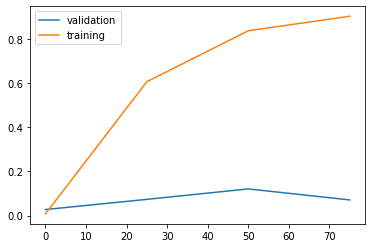

In [449]:
# Fit trained model
def run_and_store_results(nb_epoch_value):
    scoring_function_used = "mean-pearson_r2_score"
#     scoring_function_used = "r2_score"
    model.fit(train_dataset, nb_epoch=nb_epoch_value)

#     print("Evaluating model")
    train_scores =  model.evaluate(train_dataset, [metric], transformers)
    valid_scores = model.evaluate(valid_dataset, [metric], transformers)
    print("printing some value", train_scores[scoring_function_used])
    return train_scores[scoring_function_used],valid_scores[scoring_function_used]

#     print("Train scores")
#     print(train_scores)

#     print("Validation scores")
#     print(valid_scores)

# model.restore()

valid_scores_list=[]
train_scores_list=[]
epoch_inputs_list=[]
for nb_epoch_value in range(0,100,25):
# for nb_epoch_value in [5,20]:
    print (nb_epoch_value)
    train_scores,valid_scores = run_and_store_results(nb_epoch_value)
    epoch_inputs_list.append(nb_epoch_value)
    valid_scores_list.append(valid_scores)
    train_scores_list.append(train_scores)
    
print(epoch_inputs_list)
print(valid_scores_list)
print(train_scores_list)

plt.plot(epoch_inputs_list, valid_scores_list, label="validation")
plt.plot(epoch_inputs_list, train_scores_list, label="training")
plt.legend()
# dir(train_scores)
# print(dic["C"])
# print(valid_scores["mean-pearson_r2_score"])

[0, 25, 50, 75]
[0.059507083006084545, 0.23448075094701867, 0.34678752538255014, 0.32035957816137584]
[0.00110740057490291, 0.6215582325238781, 0.8400002361856669, 0.904254629419131]


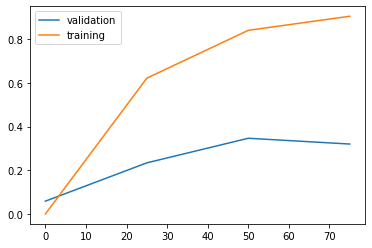

In [443]:
plt.plot(epoch_inputs_list, valid_scores_list, label="validation")
plt.plot(epoch_inputs_list, train_scores_list, label="training")
plt.legend()
print(epoch_inputs_list)
print(valid_scores_list)
print(train_scores_list)


In [ ]:
model.save()
model = model.load_from_dir('models')
valid_scores = model.evaluate(valid_dataset, [metric], transformers)

In [50]:
jinga=[]
jinga.append(10)

In [51]:
jinga

[10]